## Linear Regression with Ocean Temperature

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('D:\WORK\ML_GUI\AI Course Datasets\Regression_Datasets\WeatherData\Quality\weatherHistory_1.5kX3.csv')
print(df.head())
print(df.shape)

# print(df['T_degC'].min())
# print(df['T_degC'].max())

   Temperature (C)  Pressure (millibars)  Humidity  Wind Speed (km/h)
0         9.472222               1015.13      0.89            14.1197
1         9.355556               1015.63      0.86            14.2646
2         9.377778               1015.94      0.89             3.9284
3         8.288889               1016.41      0.83            14.1036
4         8.755556               1016.51      0.83            11.0446
(1499, 4)


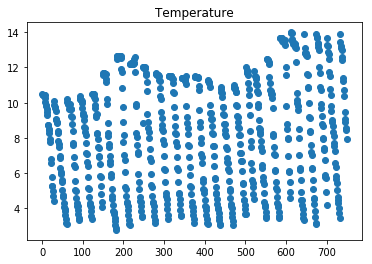

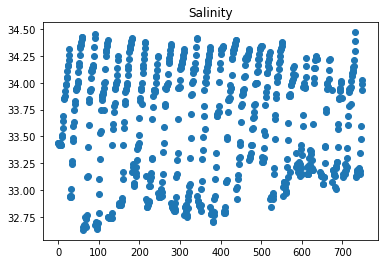

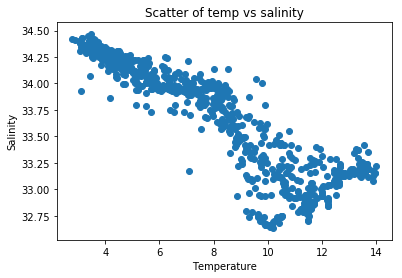

In [3]:
plt.figure()
plt.plot(df['T_degC'], linestyle='None', marker='o')
plt.title("Temperature")
plt.show()

plt.figure()
plt.plot(df['Salnty'], linestyle='None', marker='o')
plt.title("Salinity")
plt.show()

plt.scatter(df['T_degC'], df['Salnty'])
plt.xlabel("Temperature")
plt.ylabel("Salinity")
plt.title("Scatter of temp vs salinity")
plt.show()

### Is the relationship positive or negative?
### How to filter this dataset

In [4]:
print(df.mean())

print(df.isnull().sum())

df = df.dropna()
df.shape

T_degC     8.226537
Salnty    33.618971
dtype: float64
T_degC     2
Salnty    23
dtype: int64


(725, 2)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(df['Pressure (millibars)'], df['Temperature (C)'], test_size=0.25)
print(X_train.shape)
print(X_train.values.reshape(-1, 1).shape) # convert it into a rowxcol matrix instead

(1124,)
(1124, 1)


In [4]:
lm = LinearRegression()
lm_model = lm.fit(X_train.values.reshape(-1, 1), y_train)

In [5]:
lm_model.coef_

array([-0.00195146])

In [6]:
obtained_y_test = lm.predict(X_test.values.reshape(-1, 1))

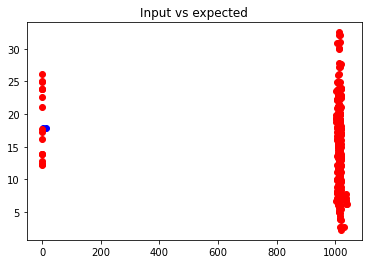

In [7]:
plt.plot([2, 14.5], lm.predict([[2], [14.5]]), marker='o', color='b')
plt.plot(X_test, y_test, linestyle='None', marker='o', color='r')
# plt.plot(X_test, obtained_y_test, linestyle='None', marker='o', color='g')
plt.title("Input vs expected")
plt.show()

In [8]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_true = y_test, y_pred = obtained_y_test)
print("MSE = %f" % mse)

MSE = 34.589969


In [11]:
lm.score(X_test.values.reshape(-1, 1), y_test)

0.8208828437359779

In [12]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

scores = cross_val_score(lm, df['T_degC'].values.reshape(-1,1), df['Salnty'].values.reshape(-1,1), cv=10)
print("Cross-validated scores:", scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Cross-validated scores: [0.647286   0.67342518 0.91192349 0.88394689 0.86653959 0.85886846
 0.73657739 0.78940619 0.39544681 0.73126865]
Accuracy: 0.75 (+/- 0.29)


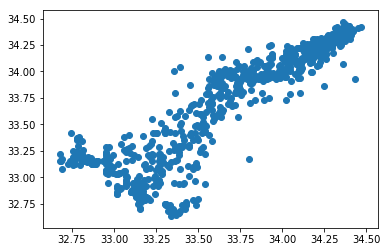

In [13]:
predictions = cross_val_predict(lm, df['T_degC'].values.reshape(-1,1), df['Salnty'].values.reshape(-1,1), cv=10)
plt.scatter(predictions, df['Salnty'])

In [14]:
accuracy = metrics.r2_score(df['Salnty'], predictions)
accuracy

0.7740888772486694